# Classification 

-------------

## Exercise

This question should be answered using the `Weekly` data set. This data is similar in nature to the `Smarket` data from earlier, except that it contains 1,089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

1. Produce some numerical and graphical summaries of the `Weekly`
data. Do there appear to be any patterns?

2. Use the full data set to perform a logistic regression with
`Direction` as the response and the five lag variables plus `Volume`
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

3. Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

4. Now fit the logistic regression model using a training data period
from 1990 to 2008, with `Lag2` as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

5. Repeat (4) using LDA.
6. Repeat (4) using QDA.
7. Repeat (4) using KNN with K = 1.
8. Which of these methods appears to provide the best results on
this data?

9. Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should

In [29]:
import pandas as pd
import numpy as np

weekly = pd.read_csv('Weekly.csv', usecols=range(1,10), index_col=0, parse_dates=True)
weekly.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990-01-01,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1990-01-01,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
1990-01-01,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
1990-01-01,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
1990-01-01,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [30]:
weekly.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


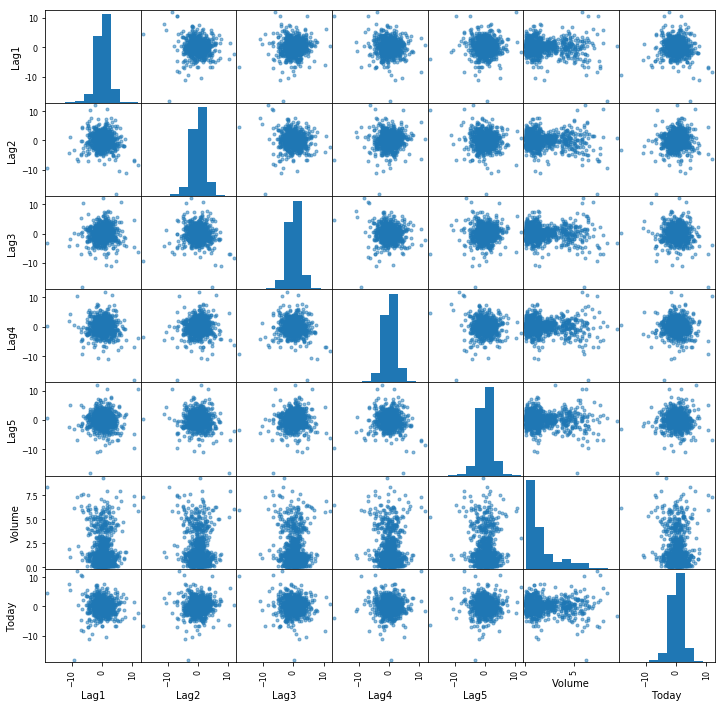

In [31]:
%matplotlib inline
from pandas.tools.plotting import scatter_matrix

scatter_matrix(weekly, figsize=(12,12));

In [32]:
weekly.corr()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


2) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'

In [34]:
model = smf.glm(formula=formula, data=weekly, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Tue, 11 Apr 2017   Deviance:                       1486.4
Time:                                          17:08:12   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

Lag2 looks statistically significant with p = 0.03

3) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

In [35]:
print(np.column_stack((weekly.as_matrix(columns=["Direction"]).flatten(), result.model.endog)))

[['Down' 1.0]
 ['Down' 1.0]
 ['Up' 0.0]
 ..., 
 ['Up' 0.0]
 ['Up' 0.0]
 ['Up' 0.0]]


In [36]:
predictions = result.predict()
predictions_nominal = ['Up' if x < 0.5 else 'Down' for x in predictions]

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(weekly['Direction'], predictions_nominal))

[[ 54 430]
 [ 48 557]]


Predict correctly on 557 weeks that market will go up and 54 that markets will go down = 601 correct predictions.

4) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [59]:
x_train = weekly[:'2008'][['Lag2','Direction']]
y_train = weekly[:'2008']['Direction']

x_test = weekly['2009':][['Lag2','Direction']]
y_test = weekly['2009':]['Direction']

In [44]:
formula = 'Direction ~ Lag2'

In [45]:
model = smf.glm(formula=formula, data=x_train, family=sm.families.Binomial())
result = model.fit()

In [49]:
predictions = result.predict(x_test)
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]
print(confusion_matrix(y_test, predictions_nominal))

[[ 9 34]
 [ 5 56]]


In [50]:
(9 + 56) / (9 + 34 + 5 + 56)

0.625

In [79]:
x_train = weekly[:'2008'][['Lag1', 'Lag2','Direction']]
y_train = weekly[:'2008']['Direction']

x_test = weekly['2009':][['Lag1', 'Lag2','Direction']]
y_test = weekly['2009':]['Direction']

In [80]:
formula = 'Direction ~ Lag1 + Lag2'
model = smf.glm(formula=formula, data=x_train, family=sm.families.Binomial())
result = model.fit()
predictions = result.predict(x_test)
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]
print(confusion_matrix(y_test, predictions_nominal))

[[ 7 36]
 [ 8 53]]


In [81]:
60/(60+44)

0.5769230769230769

5) Repeat (4) using LDA.

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [68]:
x_train = weekly[:'2008'][['Lag1','Lag2']]
y_train = weekly[:'2008']['Direction']

x_test = weekly['2009':][['Lag1','Lag2']]
y_test = weekly['2009':]['Direction']

In [69]:
lda = LDA()
model = lda.fit(x_train, y_train)

In [71]:
pred=model.predict(x_test)
print(np.unique(pred, return_counts=True))

(array(['Down', 'Up'], 
      dtype='<U4'), array([15, 89]))


In [72]:
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

[[ 7  8]
 [36 53]]
             precision    recall  f1-score   support

       Down      0.467     0.163     0.241        43
         Up      0.596     0.869     0.707        61

avg / total      0.542     0.577     0.514       104



6) Repeat (4) using QDA.

In [73]:
qda = QDA()
model2 = qda.fit(x_train, y_train)

In [75]:
pred2=model2.predict(x_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

(array(['Down', 'Up'], dtype=object), array([17, 87]))
[[ 7 10]
 [36 51]]
             precision    recall  f1-score   support

       Down      0.412     0.163     0.233        43
         Up      0.586     0.836     0.689        61

avg / total      0.514     0.558     0.501       104



7) Repeat (4) using KNN with K = 1.

8) Which of these methods appears to provide the best results on
this data?

9) Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should

In [76]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(x_train, y_train).predict(x_test)

print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[18 29]
 [25 32]]
             precision    recall  f1-score   support

       Down      0.383     0.419     0.400        43
         Up      0.561     0.525     0.542        61

avg / total      0.488     0.481     0.484       104



Logistic Regression and LDA have the lowest error rates. QDA is next, then KNN.

In [86]:
formula = 'Direction ~ np.power(Lag3, 2)'
model = smf.glm(formula=formula, data=weekly, family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1087
Model Family:                                  Binomial   Df Model:                            1
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -747.86
Date:                                  Wed, 12 Apr 2017   Deviance:                       1495.7
Time:                                          17:12:38   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2073      0.065     -3.175      0.001      -0.335      -0.079
np.power(Lag3, 2)    -0.0029      0.004     -0.668      0.504      -0.011       0.006
=====================================================================================
"""

## Exercise 

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

1) Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains
a value above its median, and a 0 if `mpg` contains a value below
its median. 

In [89]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [91]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)

2) Explore the data graphically in order to investigate the association
between `mpg01` and the other features. Which of the other
features seem most likely to be useful in predicting `mpg01`? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

In [92]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


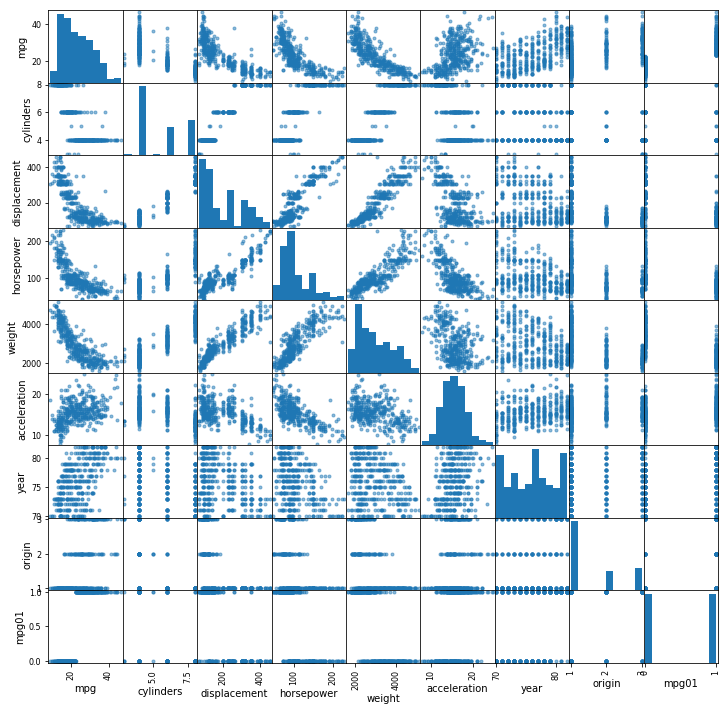

In [94]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(auto, figsize=(12,12));

3) Split the data into a training set and a test set.

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train, test = train_test_split(auto[['cylinders', 'displacement', 'horsepower', 'weight', 'mpg01']], 
                               test_size=0.5, random_state=0)
train_x = train.drop('mpg01', 1)
train_y = train['mpg01']
test_x = test.drop('mpg01', 1)
test_y = test['mpg01']

4) Perform LDA on the training data in order to predict `mpg01`
using the variables that seemed most associated with `mpg01` in
(2). What is the test error of the model obtained?

In [98]:
lda.fit(train_x, train_y)
confusion_matrix(test_y, lda.predict(test_x))

array([[85, 15],
       [ 8, 88]])

In [99]:
1 - lda.score(test_x, test_y) # error rate

0.11734693877551017

5) Perform QDA on the training data in order to predict `mpg01`
using the variables that seemed most associated with `mpg01` in
(2). What is the test error of the model obtained?

In [100]:
qda.fit(train_x, train_y)
confusion_matrix(test_y, qda.predict(test_x))

array([[89, 11],
       [10, 86]])

In [101]:
1 - qda.score(test_x, test_y) # error rate

0.1071428571428571

6) Perform logistic regression on the training data in order to predict
`mpg01` using the variables that seemed most associated with
`mpg01` in (2). What is the test error of the model obtained?

In [103]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x, train_y)
confusion_matrix(test_y, lr.predict(test_x))

array([[84, 16],
       [11, 85]])

In [104]:
1 - lr.score(test_x, test_y)

0.13775510204081631

7) Perform KNN on the training data, with several values of K, in
order to predict `mpg01`. Use only the variables that seemed most
associated with `mpg01` in (2). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [109]:
errors = []

for k in range(1, 101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    error = 1 - knn.score(test_x, test_y)
    errors.append(error)
    print('For k = {} the error rate is {:.3f}'.format(k, error))

For k = 1 the error rate is 0.128
For k = 2 the error rate is 0.133
For k = 3 the error rate is 0.138
For k = 4 the error rate is 0.122
For k = 5 the error rate is 0.148
For k = 6 the error rate is 0.148
For k = 7 the error rate is 0.148
For k = 8 the error rate is 0.143
For k = 9 the error rate is 0.153
For k = 10 the error rate is 0.143
For k = 11 the error rate is 0.143
For k = 12 the error rate is 0.143
For k = 13 the error rate is 0.148
For k = 14 the error rate is 0.148
For k = 15 the error rate is 0.148
For k = 16 the error rate is 0.143
For k = 17 the error rate is 0.148
For k = 18 the error rate is 0.143
For k = 19 the error rate is 0.148
For k = 20 the error rate is 0.148
For k = 21 the error rate is 0.148
For k = 22 the error rate is 0.148
For k = 23 the error rate is 0.153
For k = 24 the error rate is 0.148
For k = 25 the error rate is 0.148
For k = 26 the error rate is 0.148
For k = 27 the error rate is 0.148
For k = 28 the error rate is 0.148
For k = 29 the error rate is 

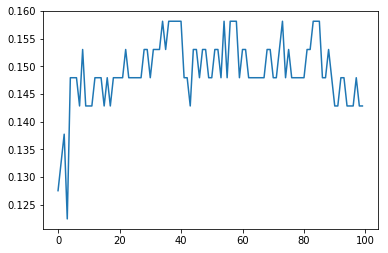

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(errors)

## Excercise

Using the `Boston` data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, and KNN models using various subsets
of the predictors. Describe your findings.

In [113]:
boston = pd.read_csv('Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [116]:
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)

In [117]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.608741


In [119]:
train, test = train_test_split(boston, test_size=0.5, random_state=0)

train_x = train.drop(['crim', 'crim01'], 1)
train_y = train['crim01']
test_x = test.drop(['crim', 'crim01'], 1)
test_y = test['crim01']

In [120]:
lda.fit(train_x, train_y)
print(confusion_matrix(test_y, lda.predict(test_x)))

qda.fit(train_x, train_y)
print(confusion_matrix(test_y, qda.predict(test_x)))

lr.fit(train_x, train_y)
print(confusion_matrix(test_y, lr.predict(test_x)))

knn.fit(train_x, train_y)
print(confusion_matrix(test_y, knn.predict(test_x)))

[[118   3]
 [ 35  97]]
[[120   1]
 [ 25 107]]
[[106  15]
 [ 22 110]]
[[119   2]
 [ 63  69]]


In [124]:
print('LDA score: ' + str(1 - lda.score(test_x, test_y)))
print('QDA score: ' + str(1 - qda.score(test_x, test_y)))
print('LogReg score: ' + str(1 - lr.score(test_x, test_y)))
print('KNN score: ' + str(1 - knn.score(test_x, test_y)))

LDA score: 0.150197628458
QDA score: 0.102766798419
LogReg score: 0.146245059289
KNN score: 0.256916996047
